# RNN
#### Test 1

### Data preparation and training stage.

####  LSTM and RNN

Long short-term memory (LSTM)is an architecture of recurrent neural networks (RNN) that can memorise past events, which in effect, it is possible to produce predictions of time series in areas such as stock price predictions, quotations or weather that is, impossible with the usage of classic neural network architectures.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import yfinance as yf
from keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
# training Disney data obtaining

In [3]:
# original dataframe, will be usefull for later stage when scaling/unscaling is necessary

####  Obtaining training data

The first part requires downloading the Disney dataset that will be used for model training purposes. The period of training dataset will be five years, using the Yahoo Finance library. The same data will be downloaded twice under two different variable names, as the original dataset will be required in the later stage of the process.

In [4]:
training_data_full = yf.download('DIS', start='2018-06-01', end='2023-05-31')

[*********************100%***********************]  1 of 1 completed


In [5]:
training_data_full = pd.DataFrame(training_data_full)

In [6]:
training_data_full = training_data_full.reset_index()

In [7]:
training_data_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-01,99.690002,100.050003,99.199997,99.360001,96.628090,6847700
1,2018-06-04,99.760002,100.500000,99.699997,100.239998,97.483894,6598000
2,2018-06-05,100.360001,100.510002,99.779999,99.940002,97.192146,5974400
3,2018-06-06,100.059998,101.940002,99.760002,101.910004,99.107979,7833000
4,2018-06-07,101.910004,102.959999,101.809998,102.470001,99.652580,7559200


In [8]:
training_data_full.iloc[:,4]

0        99.360001
1       100.239998
2        99.940002
3       101.910004
4       102.470001
           ...    
1252     89.820000
1253     89.070000
1254     88.139999
1255     88.290001
1256     87.820000
Name: Close, Length: 1257, dtype: float64

In [9]:
training_data = yf.download('DIS', start='2018-06-01', end='2023-05-31')

[*********************100%***********************]  1 of 1 completed


In [10]:
training_data = pd.DataFrame(training_data)

In [11]:
training_data = training_data.reset_index()

#### Disney stock prices overview.

Before further analysis, below is a simple overview of Disney prices in comparison to the stock prices in the years 2018 and 2023, including the shape of the training dataset.

In [12]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-01,99.690002,100.050003,99.199997,99.360001,96.628090,6847700
1,2018-06-04,99.760002,100.500000,99.699997,100.239998,97.483902,6598000
2,2018-06-05,100.360001,100.510002,99.779999,99.940002,97.192146,5974400
3,2018-06-06,100.059998,101.940002,99.760002,101.910004,99.107979,7833000
4,2018-06-07,101.910004,102.959999,101.809998,102.470001,99.652588,7559200


In [13]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-05-23,91.099998,92.029999,89.809998,89.820000,89.820000,14778700
1253,2023-05-24,89.440002,89.489998,88.410004,89.070000,89.070000,15350800
1254,2023-05-25,89.559998,89.559998,87.790001,88.139999,88.139999,13605800
1255,2023-05-26,88.489998,89.239998,88.099998,88.290001,88.290001,12892700
1256,2023-05-30,88.970001,88.970001,87.010002,87.820000,87.820000,14800700


In [14]:
training_data.shape

(1257, 7)

#### Disney closing price plot

As the target feature for further prediction will be the close price, below is the plot showing how the closing price has performed over the time of five previous years.

<AxesSubplot:>

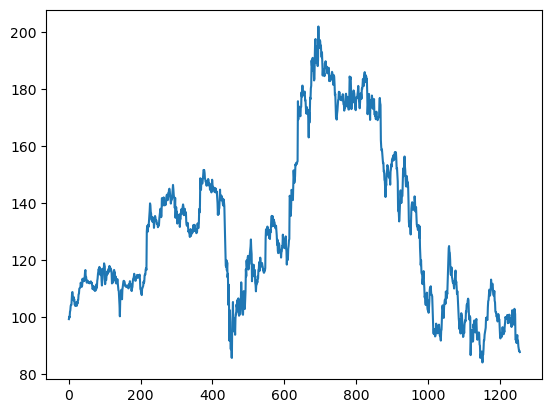

In [15]:
training_data['Close'].plot()

#### pairplot: correlations.

The pair plot below provides information about correlations between all features included in the training dataset, such as opening price (which represents the price that was at the beginning of the trading day), high price (which represents the highest price value in a particular day) volume (total shares that were traded in a particular day) or closing price (which is the final price recorder in a particular trading date).

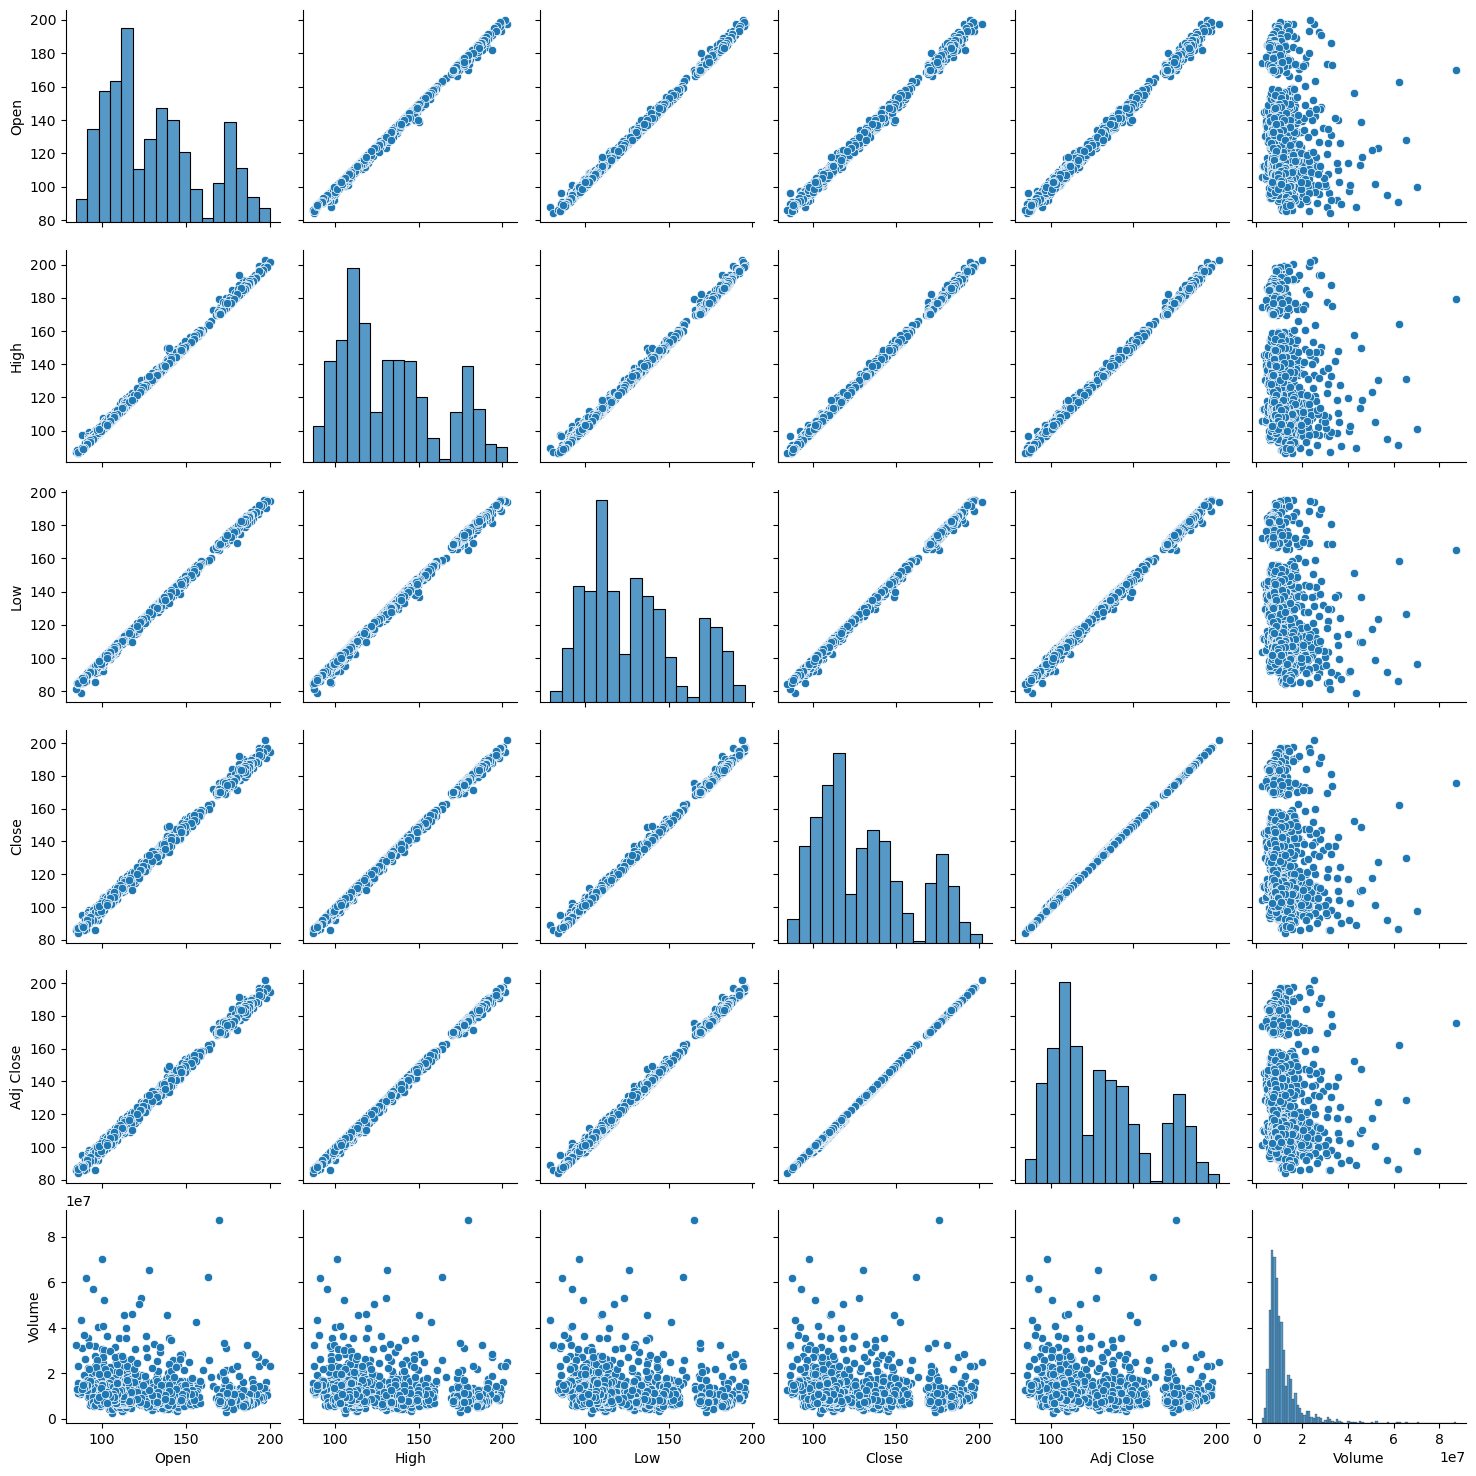

In [16]:
# this data is highly correlated. data is regular.

sns.pairplot(training_data)

#### Trainig data array

To train the model, it requires only one feature, which will be the Close date, however, the Keras and TensorFlow require the array data structure, therefore it has also been changed below.

In [17]:
training_data = training_data.iloc[:, 4].values

In [18]:
training_data

array([ 99.36000061, 100.23999786,  99.94000244, ...,  88.13999939,
        88.29000092,  87.81999969])

In [19]:
# no mising values

training_data_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,130.948417,132.291130,129.392514,130.852824,130.367719,1.143412e+07
std,28.543640,28.692663,28.348086,28.477631,28.684890,7.563146e+06
min,84.489998,86.690002,79.070000,84.169998,84.169998,2.406300e+06
25%,109.000000,110.180000,107.660004,109.190002,108.120003,7.250900e+06
50%,125.750000,127.349998,123.709999,125.070000,125.070000,9.251000e+06
75%,147.389999,148.649994,146.029999,147.339996,146.880005,1.271560e+07
max,200.190002,203.020004,195.399994,201.910004,201.910004,8.741070e+07


#### Data scaling

As the Close feature data has different value magnitudes MinMaxScaller has been used. If the data are highly skewed and include outliers, a better choice would be using StandardScaller(). 

The main reason data needs to be scaled is that the algorithms can “understand“the data problem more efficiently and minimalise the loss, which is the main goal of using RNN algorithms. Without scaling, the higher values can dominate the model, and the final effect will be poor predictions.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [23]:
training_data

array([[0.12901309],
       [0.13648717],
       [0.13393922],
       ...,
       [0.03371837],
       [0.03499238],
       [0.03100052]])

#### Timesteps

The loop below specifies the number of timesteps taking into consideration the number of previous days (observations) that will be used to perform each prediction day. In this example, the number of timesteps equals 40, which reflects about two months of stock trading (capital markets are operating between Monday - Friday).



In [24]:
# generaly speaking means that the every day that neuronetwork predicts, will look at 40 days previous stock prive to determinate its prediction


In [25]:
x_training_data = [] # independant variable
y_training_data =[] # dependant variable

In [26]:
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0]) # each iteration appends 40 stock prices starting from 40:
    y_training_data.append(training_data[i, 0])

as the timesteps are in lists, next step is changing them to arrays

In [27]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [28]:
print(x_training_data.shape) # 40 days and 1217 observations
print(y_training_data.shape)

(1217, 40)
(1217,)


#### 3 dimension array

As the timesteps are in lists, the next step is changing them to arrays. X_training_data array currently has 2 dimensions with 40 features (columns) and 1217 observations. As TensorFlow requires a specific format for the data, the X_training array has to be changed to 3-dimensional, which is done by the function below.

In [29]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], # 1st dim will be the 1st part of the tuple
                                               x_training_data.shape[1], # 2nd dim will be a second part of the tuple
                                               1)) # 3th will be 1

In [30]:
x_training_data.shape

(1217, 40, 1)

#### The RNN 

Once training data has been prepared, in this section, the RNN model will be prepared.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

The Sequental is used for neural network building. It allows the addition of layers to the model, in the case below LSTM class neurons which replace traditional RNN neurons to perform computations. 

In [32]:
rnn = Sequential()

#### First layer - input layer

To build the model LSTM requires specification of parameters such as:

- Number of neurons (units) which will increase the dimensionality of the model among with increasing the neurons number.
- Return sequences True/ False: True if additional layers will be added.
- Input_shape_ Total number of timesteps and number of predictors in relation to the training data. In this model, 40 timesteps are used and one predictor/feature, which is a Disney closing price and is specified as follows: x_training_data.shape[1] (timesteps number) and 1 - predictor (closing price)

As the training dataset has 40 timesteps, a slightly higher value of that in terms of neurons/unit estimation has been used.

In [33]:
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

#### Dropouts

Dropout class specifies the number of neurons to be dropped in the selected layer. This regularization technique is used to avoid model overfitting and improve model performance.

The dense layer receives input from previous layers in the model and a specified number of returning outputs.

In [34]:
rnn.add(Dropout(0.2)) # stops overfiting by ignoring 20% of passed values

#### Hidden layers and output layer 

Below are added three more hidden layers which should improve a model’s performance and add pattern complexity.

The dense layer receives input from previous layers in the model and a specified number of returning outputs.

In [35]:
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45))
rnn.add(Dropout(0.2))

rnn.add(Dense(units = 1))

#### Optimizer and RNN compiler

Another step is the optimizer choice to compile RNN. Adam has been used, as it is an optimizer which can be used with various neural network architectures.

In [36]:
rnn.compile(optimizer = 'adam', loss = 'mse', metrics=["accuracy"]) # loss mean squer error, metrics added

#### RNN training

The last RNN building stage is the training stage, which requires the specification of four parameters which are data that will be used for RNN training, number of epochs ( which in this example will be 100 as it seems to be an industry standard), and the batch_size which represents the number of samples in the network that the algorithm will be used for training.

In [37]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 5s 26ms/step - loss: 0.0337 - accuracy: 0.0016
Epoch 2/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0084 - accuracy: 0.0016
Epoch 3/100
39/39 [==============================] - 1s 31ms/step - loss: 0.0081 - accuracy: 0.0016
Epoch 4/100
39/39 [==============================] - 1s 32ms/step - loss: 0.0100 - accuracy: 0.0016
Epoch 5/100
39/39 [==============================] - 1s 32ms/step - loss: 0.0069 - accuracy: 0.0016
Epoch 6/100
39/39 [==============================] - 1s 32ms/step - loss: 0.0059 - accuracy: 0.0016
Epoch 7/100
39/39 [==============================] - 1s 32ms/step - loss: 0.0055 - accuracy: 0.0016
Epoch 8/100
39/39 [==============================] - 1s 34ms/step - loss: 0.0057 - accuracy: 0.0016
Epoch 9/100
39/39 [==============================] - 1s 34ms/step - loss: 0.0054 - accuracy: 0.0016
Epoch 10/100
39/39 [==============================] - 1s 34ms/step - loss: 0.0053 - accuracy: 0.0016

39/39 [==============================] - 1s 35ms/step - loss: 0.0017 - accuracy: 0.0016
Epoch 83/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0014 - accuracy: 0.0016
Epoch 84/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0014 - accuracy: 0.0016
Epoch 85/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0014 - accuracy: 0.0016
Epoch 86/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0016 - accuracy: 0.0016
Epoch 87/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0018 - accuracy: 0.0016
Epoch 88/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0019 - accuracy: 0.0016
Epoch 89/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0017 - accuracy: 0.0016
Epoch 90/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0016 - accuracy: 0.0016
Epoch 91/100
39/39 [==============================] - 1s 35ms/step - loss: 0.0016 - accuracy: 0.0016
Epo

In [38]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 45)            8460      
                                                                 
 dropout (Dropout)           (None, 40, 45)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40, 45)            16380     
                                                                 
 dropout_1 (Dropout)         (None, 40, 45)            0         
                                                                 
 lstm_2 (LSTM)               (None, 40, 45)            16380     
                                                                 
 dropout_2 (Dropout)         (None, 40, 45)            0         
                                                                 
 lstm_3 (LSTM)               (None, 45)                1

As can be seen above the loss function declined during iteration as expected, starting from 0.0354 to 0.0014.

### Prediction stage

First, test data has been downloaded to be able to compare the predictions to actual stock prices. Similar to obtaining a training set, the same data will be downloaded twice using two different names.

As the goal is to predict one month Disney stock close price - 20 timesteps have been obtained.

In [39]:
test_data_full = yf.download("DIS", start="2023-06-01", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [40]:
test_data_full = pd.DataFrame(test_data_full)

In [41]:
test_data_full = test_data_full.reset_index()

In [42]:
test_data_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-01,88.400002,89.059998,87.110001,88.589996,88.589996,11993200
1,2023-06-02,89.629997,91.339996,89.599998,90.769997,90.769997,14330500
2,2023-06-05,91.199997,91.760002,89.440002,91.000000,91.000000,18506700
3,2023-06-06,91.099998,92.510002,91.019997,92.160004,92.160004,12109100
4,2023-06-07,92.779999,93.080002,91.860001,92.519997,92.519997,11082400


In [43]:
test_data = yf.download("DIS", start="2023-06-01", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [44]:
test_data.shape

(20, 6)

In [45]:
test_data = pd.DataFrame(test_data)

In [46]:
test_data = test_data.reset_index()

In [47]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-01,88.400002,89.059998,87.110001,88.589996,88.589996,11993200
1,2023-06-02,89.629997,91.339996,89.599998,90.769997,90.769997,14330500
2,2023-06-05,91.199997,91.760002,89.440002,91.000000,91.000000,18506700
3,2023-06-06,91.099998,92.510002,91.019997,92.160004,92.160004,12109100
4,2023-06-07,92.779999,93.080002,91.860001,92.519997,92.519997,11082400


In [48]:
test_data = test_data.iloc[:, 4].values

In [49]:
test_data.shape

(20,)

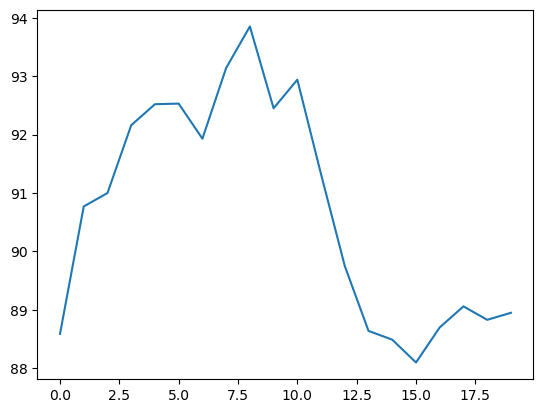

In [50]:
plt.plot(test_data)

#### Concat

In order to perform each 20 timesteps (days) of June training, 40 timesteps from previous months is required; therefore concatenation of the data is required. 

Because part of the data has been scaled in the training stage, reimport of the original data frame has been performed. 


In [51]:
unscaled_training_data = training_data_full

unscaled_test_data = test_data_full

In [52]:
# concatination of CLOSE data only

In [53]:
all_data=pd.concat((unscaled_training_data['Close'],unscaled_test_data['Close']), axis = 0)

In [54]:
all_data.shape

(1277,)

The code below creates an array used for stock predictions from 20 June timesteps and 40 prior timesteps. As the outcome of the code is 1 dimensional, the change to 2 dimension array has also been performed to be suitable for the prediction function.

In [55]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values

In [56]:
# 40 days plus 20 days from test
x_test_data.shape

(60,)

In [57]:
x_test_data = np.reshape(x_test_data, (-1, 1))
x_test_data

array([[ 99.76000214],
       [ 99.56999969],
       [ 99.91000366],
       [ 99.97000122],
       [100.80999756],
       [100.41999817],
       [ 97.94000244],
       [100.83999634],
       [ 99.90000153],
       [100.30000305],
       [100.93000031],
       [ 98.75      ],
       [ 98.06999969],
       [ 99.56999969],
       [ 99.68000031],
       [ 98.01000214],
       [ 96.61000061],
       [ 99.93000031],
       [102.5       ],
       [102.20999908],
       [100.59999847],
       [100.86000061],
       [ 97.44999695],
       [100.51999664],
       [102.97000122],
       [102.18000031],
       [101.13999939],
       [ 92.30999756],
       [ 91.98999786],
       [ 92.86000061],
       [ 90.98000336],
       [ 92.76999664],
       [ 93.76000214],
       [ 91.34999847],
       [ 91.81999969],
       [ 89.81999969],
       [ 89.06999969],
       [ 88.13999939],
       [ 88.29000092],
       [ 87.81999969],
       [ 88.58999634],
       [ 90.76999664],
       [ 91.        ],
       [ 92

Also, the RNN model has been trained on scaled data, test data have to be scaled as well. 

In [58]:
x_test_data = scaler.transform(x_test_data)

#### Test data grouping

Loop below grouping test data into 21 tables where each June entry corresponds to the price of the last 40 trading days.

In [59]:
final_x_test_data = []

for i in range(40, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-40:i, 0])

final_x_test_data = np.array(final_x_test_data)

As previously said, TensorFlow requires 3 dimensional array data to be able to perform predictions, which has been done below. 

In [60]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

#### Prediction

In [61]:
predictions = rnn.predict(final_x_test_data)

1/1 [==============================] - 1s 916ms/step


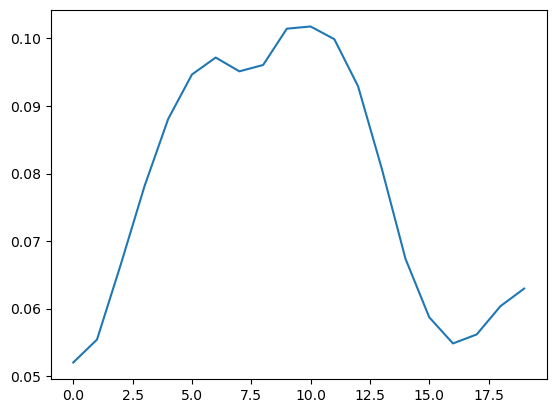

In [62]:
plt.plot(predictions) 


As the values were scaled before fitting the model, it is required to unscale the data to see actual stock price predicted values.


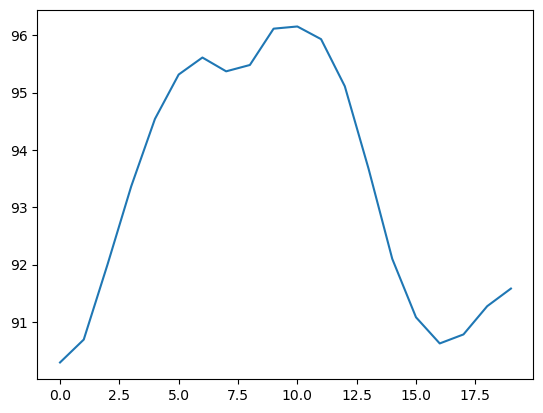

In [63]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions)

#### Diseny close price: predicted vs real.

The plot below shows two values: real Disney close data in comparison to the predicted close data.

It is worth highlighting that each time the RNN is re-run, different predictions and outcome is generated. At the time of writing the report difference between predicted and tested values were around ~$2 on the first and last day of the prediction/test.

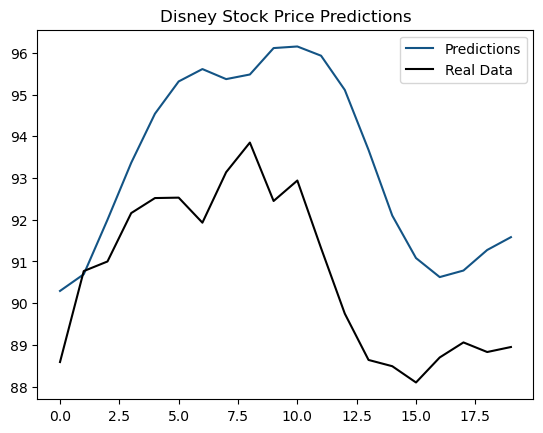

In [64]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('Disney Stock Price Predictions')

plt.legend()

In [65]:
print("The first trading day price prediction is for June 2023 is: ",unscaled_predictions[0])
print("The real first trading day price for June 2023 is: ",test_data[0])

The first trading day price prediction is for June 2023 is:  [90.294044]
The real first trading day price for June 2023 is:  88.58999633789062


In [66]:
print("The last trading day price prediction is for June 2023 is: ",unscaled_predictions[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction is for June 2023 is:  [91.582954]
The real last trading day price for June 2023 is:  88.94999694824219


# Prediction improvement test: Manual

Each of the tests has been performed from the beginning to the end in terms of data pre-processing till actual predictions to avoid any mistakes or confusion. In the *TEST* headers, changes performed have been described and briefly explained at the end of all tests.

### TEST 2

40 previous timesteps for each of the 20 predictions have been used.

5 layers:

* Input layer: 150 units
* Hidden layers: 80/45/32 units
* Output layer: 1 unit
* epochs: 150
* batch siez: 32

In [67]:
training_data_full = yf.download('DIS', start='2018-06-01', end='2023-05-31')
training_data_full = pd.DataFrame(training_data_full)
training_data_full = training_data_full.reset_index()

[*********************100%***********************]  1 of 1 completed


In [68]:
training_data_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-01,99.690002,100.050003,99.199997,99.360001,96.628090,6847700
1,2018-06-04,99.760002,100.500000,99.699997,100.239998,97.483902,6598000
2,2018-06-05,100.360001,100.510002,99.779999,99.940002,97.192146,5974400
3,2018-06-06,100.059998,101.940002,99.760002,101.910004,99.107979,7833000
4,2018-06-07,101.910004,102.959999,101.809998,102.470001,99.652588,7559200


In [69]:
training_data = yf.download('DIS', start='2018-06-01', end='2023-05-31')
training_data = pd.DataFrame(training_data)
training_data = training_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [70]:
training_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-01,99.690002,100.050003,99.199997,99.360001,96.628090,6847700
1,2018-06-04,99.760002,100.500000,99.699997,100.239998,97.483894,6598000
2,2018-06-05,100.360001,100.510002,99.779999,99.940002,97.192146,5974400
3,2018-06-06,100.059998,101.940002,99.760002,101.910004,99.107979,7833000
4,2018-06-07,101.910004,102.959999,101.809998,102.470001,99.652580,7559200
...,...,...,...,...,...,...,...
1252,2023-05-23,91.099998,92.029999,89.809998,89.820000,89.820000,14778700
1253,2023-05-24,89.440002,89.489998,88.410004,89.070000,89.070000,15350800
1254,2023-05-25,89.559998,89.559998,87.790001,88.139999,88.139999,13605800
1255,2023-05-26,88.489998,89.239998,88.099998,88.290001,88.290001,12892700


In [71]:
training_data = training_data.iloc[:, 4].values

In [72]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [73]:
training_data

array([[0.12901309],
       [0.13648717],
       [0.13393922],
       ...,
       [0.03371837],
       [0.03499238],
       [0.03100052]])

In [74]:
x_training_data = [] # independant variable
y_training_data =[] 

In [75]:
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

In [76]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [77]:
print(x_training_data.shape) # 40 days and 1217 observations
print(y_training_data.shape)

(1217, 40)
(1217,)


In [78]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], # 1st dim will be the 1st part of the tuple
                                               x_training_data.shape[1], # 2nd dim will be a second part of the tuple
                                               1)) # 3th will be 1

In [79]:
x_training_data.shape

(1217, 40, 1)

In [80]:
rnn = Sequential()

In [81]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)
rnn.add(LSTM(units = 150, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 80, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 32))
rnn.add(Dropout(0.2))
# and final layer will be dense layer to return only on eprice
rnn.add(Dense(units = 1))

In [82]:
rnn.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

In [83]:
rnn.fit(x_training_data, y_training_data, epochs = 125, batch_size = 32) # more batch size make the prediction line more smooth/general

Epoch 1/125
39/39 [==============================] - 6s 42ms/step - loss: 0.0249 - accuracy: 0.0016
Epoch 2/125
39/39 [==============================] - 2s 45ms/step - loss: 0.0084 - accuracy: 0.0016
Epoch 3/125
39/39 [==============================] - 2s 45ms/step - loss: 0.0081 - accuracy: 0.0016
Epoch 4/125
39/39 [==============================] - 2s 47ms/step - loss: 0.0069 - accuracy: 0.0016
Epoch 5/125
39/39 [==============================] - 2s 46ms/step - loss: 0.0056 - accuracy: 0.0016
Epoch 6/125
39/39 [==============================] - 2s 46ms/step - loss: 0.0056 - accuracy: 0.0016
Epoch 7/125
39/39 [==============================] - 2s 46ms/step - loss: 0.0053 - accuracy: 0.0016
Epoch 8/125
39/39 [==============================] - 2s 46ms/step - loss: 0.0051 - accuracy: 0.0016
Epoch 9/125
39/39 [==============================] - 2s 46ms/step - loss: 0.0055 - accuracy: 0.0016
Epoch 10/125
39/39 [==============================] - 2s 46ms/step - loss: 0.0048 - accuracy: 0.0016

39/39 [==============================] - 2s 49ms/step - loss: 0.0019 - accuracy: 0.0016
Epoch 83/125
39/39 [==============================] - 2s 48ms/step - loss: 0.0018 - accuracy: 0.0016
Epoch 84/125
39/39 [==============================] - 2s 49ms/step - loss: 0.0018 - accuracy: 0.0016
Epoch 85/125
39/39 [==============================] - 2s 50ms/step - loss: 0.0015 - accuracy: 0.0016
Epoch 86/125
39/39 [==============================] - 2s 50ms/step - loss: 0.0017 - accuracy: 0.0016
Epoch 87/125
39/39 [==============================] - 2s 49ms/step - loss: 0.0018 - accuracy: 0.0016
Epoch 88/125
39/39 [==============================] - 2s 49ms/step - loss: 0.0016 - accuracy: 0.0016
Epoch 89/125
39/39 [==============================] - 2s 49ms/step - loss: 0.0015 - accuracy: 0.0016
Epoch 90/125
39/39 [==============================] - 2s 48ms/step - loss: 0.0014 - accuracy: 0.0016
Epoch 91/125
39/39 [==============================] - 2s 49ms/step - loss: 0.0015 - accuracy: 0.0016
Epo

In [84]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 40, 150)           91200     
                                                                 
 dropout_4 (Dropout)         (None, 40, 150)           0         
                                                                 
 lstm_5 (LSTM)               (None, 40, 80)            73920     
                                                                 
 dropout_5 (Dropout)         (None, 40, 80)            0         
                                                                 
 lstm_6 (LSTM)               (None, 40, 45)            22680     
                                                                 
 dropout_6 (Dropout)         (None, 40, 45)            0         
                                                                 
 lstm_7 (LSTM)               (None, 32)               

In [85]:
test_data_full = yf.download("DIS", start="2023-06-01", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [86]:
test_data_full = pd.DataFrame(test_data_full)
test_data_full = test_data_full.reset_index()

In [87]:
test_data = yf.download("DIS", start="2023-06-01", end="2023-06-30")
test_data = pd.DataFrame(test_data)
test_data = test_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [88]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-01,88.400002,89.059998,87.110001,88.589996,88.589996,11993200
1,2023-06-02,89.629997,91.339996,89.599998,90.769997,90.769997,14330500
2,2023-06-05,91.199997,91.760002,89.440002,91.000000,91.000000,18506700
3,2023-06-06,91.099998,92.510002,91.019997,92.160004,92.160004,12109100
4,2023-06-07,92.779999,93.080002,91.860001,92.519997,92.519997,11082400


In [89]:
test_data = test_data.iloc[:, 4].values

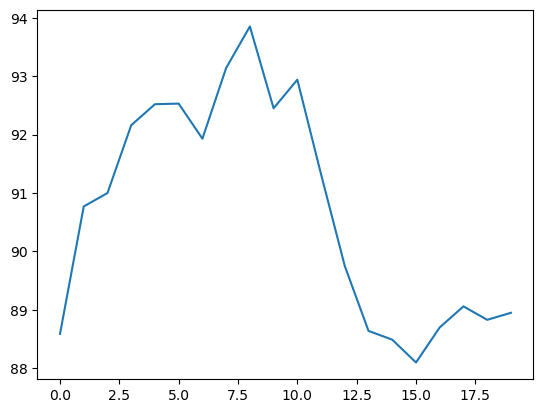

In [90]:
plt.plot(test_data)

In [91]:
unscaled_training_data = training_data_full
unscaled_test_data = test_data_full

In [92]:
all_data=pd.concat((unscaled_training_data['Close'],unscaled_test_data['Close']), axis = 0)

In [93]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values

In [94]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [95]:
x_test_data = scaler.transform(x_test_data)

In [96]:
final_x_test_data = []

for i in range(40, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-40:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [97]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [98]:
predictions = rnn.predict(final_x_test_data)

1/1 [==============================] - 1s 832ms/step


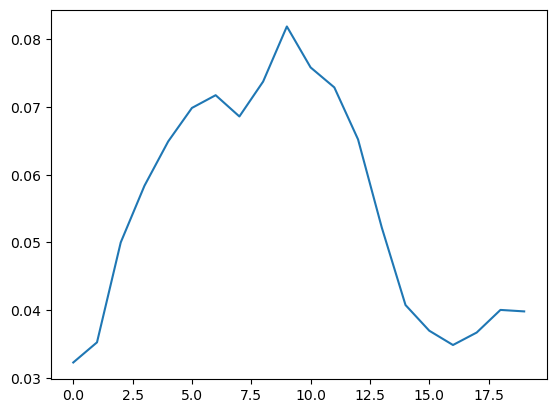

In [99]:
plt.plot(predictions) 

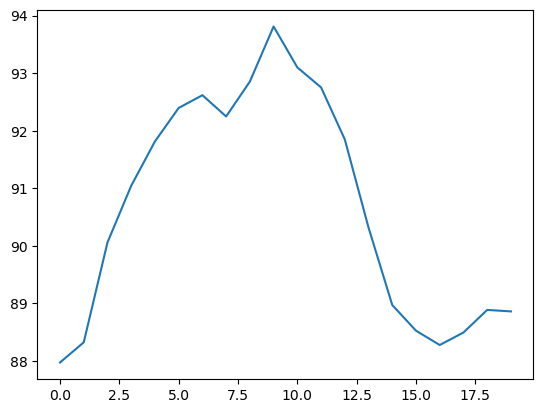

In [100]:
unscaled_predictions_2 = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions_2)

### Test 2: outcome

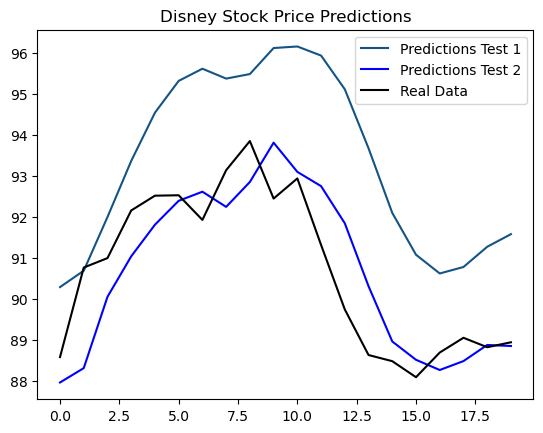

In [101]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions Test 1")
plt.plot(unscaled_predictions_2, color = 'blue', label = "Predictions Test 2")
plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('Disney Stock Price Predictions')

plt.legend()

In [102]:
print("The first trading day price prediction is for June 2023 is: ",unscaled_predictions[0])
print("The real first trading day price for June 2023 is: ",test_data[0])

The first trading day price prediction is for June 2023 is:  [90.294044]
The real first trading day price for June 2023 is:  88.58999633789062


In [103]:
print("The last trading day price prediction is for June 2023 is: ",unscaled_predictions[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction is for June 2023 is:  [91.582954]
The real last trading day price for June 2023 is:  88.94999694824219


In [104]:
print("The first trading day price prediction is for June 2023 is: ",unscaled_predictions_2[0])
print("The real first trading day price for June 2023 is: ",test_data[0])

The first trading day price prediction is for June 2023 is:  [87.971436]
The real first trading day price for June 2023 is:  88.58999633789062


In [105]:
print("The last trading day price prediction is for June 2023 is: ",unscaled_predictions_2[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction is for June 2023 is:  [88.85912]
The real last trading day price for June 2023 is:  88.94999694824219


----

# TEST 3

60 previous timesteps for each of the 20 predictions have been used.

5 layers:

* Input layer: 150 units
* Hidden layers: 80/45/32 units
* Output layer: 1 unit
* epochs: 100
* batch siez: 32



In [106]:
training_data_full = yf.download('DIS', start='2018-06-01', end='2023-05-31')
training_data_full = pd.DataFrame(training_data_full)
training_data_full = training_data_full.reset_index()

[*********************100%***********************]  1 of 1 completed


In [107]:
training_data = yf.download('DIS', start='2018-06-01', end='2023-05-31')
training_data = pd.DataFrame(training_data)
training_data = training_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [108]:
training_data = training_data.iloc[:, 4].values

In [109]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [110]:
x_training_data = [] # independant variable
y_training_data =[] 

In [111]:
for i in range(60, len(training_data)):
    x_training_data.append(training_data[i-60:i, 0])
    y_training_data.append(training_data[i, 0])

In [112]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [113]:
print(x_training_data.shape) # 40 days and 1217 observations
print(y_training_data.shape)

(1197, 60)
(1197,)


In [114]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], # 1st dim will be the 1st part of the tuple
                                               x_training_data.shape[1], # 2nd dim will be a second part of the tuple
                                               1)) # 3th 

In [115]:
rnn = Sequential()

In [116]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)
rnn.add(LSTM(units = 150, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 80, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 32))
rnn.add(Dropout(0.2))
# and final layer will be dense layer to return only on eprice
rnn.add(Dense(units = 1))

In [117]:
rnn.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

In [118]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 73ms/step - loss: 0.0330 - accuracy: 8.3542e-04
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0093 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0079 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0073 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0065 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0062 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0060 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0056 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0050 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0051 - accuracy: 0.

38/38 [==============================] - 3s 77ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 83/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 84/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 85/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 86/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 87/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 88/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 89/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 90/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 91/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0016 - accuracy: 0.0017
Epo

In [119]:
rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 150)           91200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 150)           0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 80)            73920     
                                                                 
 dropout_9 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 45)            22680     
                                                                 
 dropout_10 (Dropout)        (None, 60, 45)            0         
                                                                 
 lstm_11 (LSTM)              (None, 32)               

In [120]:
test_data_full = yf.download("DIS", start="2023-06-01", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [121]:
test_data_full = pd.DataFrame(test_data_full)
test_data_full = test_data_full.reset_index()

In [122]:
test_data = yf.download("DIS", start="2023-06-01", end="2023-06-30")
test_data = pd.DataFrame(test_data)
test_data = test_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [123]:
test_data = test_data.iloc[:, 4].values

In [124]:
unscaled_training_data = training_data_full
unscaled_test_data = test_data_full

In [125]:
all_data=pd.concat((unscaled_training_data['Close'],unscaled_test_data['Close']), axis = 0)

In [126]:
x_test_data = all_data[len(all_data) - len(test_data) - 60:].values

In [127]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [128]:
x_test_data = scaler.transform(x_test_data)

In [129]:
final_x_test_data = []

for i in range(60, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-60:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [130]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [131]:
predictions = rnn.predict(final_x_test_data)

1/1 [==============================] - 1s 826ms/step


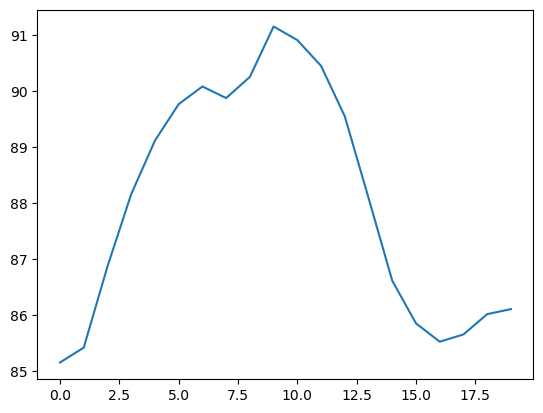

In [132]:
unscaled_predictions_3 = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions_3)

In [133]:
unscaled_predictions_3.shape

(20, 1)

### Test 3 outcome

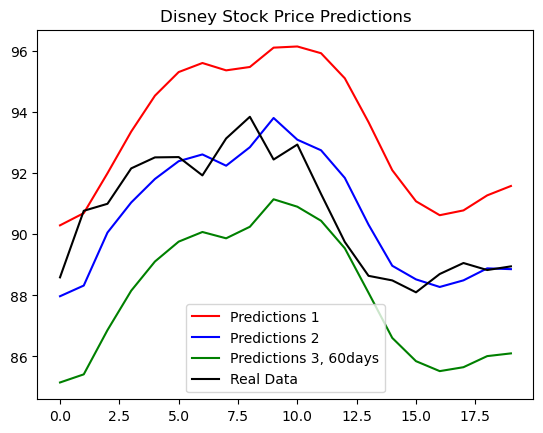

In [134]:
plt.plot(unscaled_predictions, color = 'red', label = "Predictions 1")
plt.plot(unscaled_predictions_2, color = 'blue', label = "Predictions 2")
plt.plot(unscaled_predictions_3, color = 'green', label = "Predictions 3, 60days")
plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('Disney Stock Price Predictions')

plt.legend()

In [135]:
print("The first trading day price prediction is for June 2023 is: ",unscaled_predictions_3[0])
print("The real first trading day price for June 2023 is: ",test_data[0])

The first trading day price prediction is for June 2023 is:  [85.14665]
The real first trading day price for June 2023 is:  88.58999633789062


In [136]:
print("The last trading day price prediction is for June 2023 is: ",unscaled_predictions_3[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction is for June 2023 is:  [86.09951]
The real last trading day price for June 2023 is:  88.94999694824219


---------

# TEST 4

60 previous timesteps for each of the 20 predictions have been used.

4 layers:
* Input layer: 150 units
* Hidden layers: 80/32 units
* Output layer: 1 unit
* epochs: 100
* batch siez: 32


In [137]:
training_data_full = yf.download('DIS', start='2018-06-01', end='2023-05-31')
training_data_full = pd.DataFrame(training_data_full)
training_data_full = training_data_full.reset_index()

[*********************100%***********************]  1 of 1 completed


In [138]:
training_data = yf.download('DIS', start='2018-06-01', end='2023-05-31')
training_data = pd.DataFrame(training_data)
training_data = training_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [139]:
training_data = training_data.iloc[:, 4].values

In [140]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [141]:
x_training_data = [] # independant variable
y_training_data =[] 

In [142]:
for i in range(60, len(training_data)):
    x_training_data.append(training_data[i-60:i, 0])
    y_training_data.append(training_data[i, 0])

In [143]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [144]:
print(x_training_data.shape) # 40 days and 1217 observations
print(y_training_data.shape)

(1197, 60)
(1197,)


In [145]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], # 1st dim will be the 1st part of the tuple
                                               x_training_data.shape[1], # 2nd dim will be a second part of the tuple
                                               1)) 

In [146]:
rnn = Sequential()

In [147]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

rnn.add(LSTM(units = 150, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 80, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 32))
rnn.add(Dropout(0.2))
# and final layer will be dense layer to return only on eprice
rnn.add(Dense(units = 1))

rnn.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy', 'mse'])

In [148]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 57ms/step - loss: 0.0211 - accuracy: 0.0017 - mse: 0.0211
Epoch 2/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0062 - accuracy: 0.0017 - mse: 0.0062
Epoch 3/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0057 - accuracy: 0.0017 - mse: 0.0057
Epoch 4/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0053 - accuracy: 0.0017 - mse: 0.0053
Epoch 5/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0052 - accuracy: 0.0017 - mse: 0.0052
Epoch 6/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0046 - accuracy: 0.0017 - mse: 0.0046
Epoch 7/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0044 - accuracy: 0.0017 - mse: 0.0044
Epoch 8/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0042 - accuracy: 0.0017 - mse: 0.0042
Epoch 9/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0040 - accur

38/38 [==============================] - 2s 58ms/step - loss: 0.0016 - accuracy: 0.0017 - mse: 0.0016
Epoch 73/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0015 - accuracy: 0.0017 - mse: 0.0015
Epoch 74/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0015 - accuracy: 0.0017 - mse: 0.0015
Epoch 75/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0014 - accuracy: 0.0017 - mse: 0.0014
Epoch 76/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0015 - accuracy: 0.0017 - mse: 0.0015
Epoch 77/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0014 - accuracy: 0.0017 - mse: 0.0014
Epoch 78/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0016 - accuracy: 0.0017 - mse: 0.0016
Epoch 79/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0014 - accuracy: 0.0017 - mse: 0.0014
Epoch 80/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0016 - accuracy:

In [149]:
rnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 150)           91200     
                                                                 
 dropout_12 (Dropout)        (None, 60, 150)           0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 80)            73920     
                                                                 
 dropout_13 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_14 (LSTM)              (None, 32)                14464     
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [150]:
test_data_full = yf.download("DIS", start="2023-06-01", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [151]:
test_data_full = pd.DataFrame(test_data_full)
test_data_full = test_data_full.reset_index()

In [152]:
test_data = yf.download("DIS", start="2023-06-01", end="2023-06-30")
test_data = pd.DataFrame(test_data)
test_data = test_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [153]:
test_data = test_data.iloc[:, 4].values

In [154]:
unscaled_training_data = training_data_full
unscaled_test_data = test_data_full

In [155]:
all_data=pd.concat((unscaled_training_data['Close'],unscaled_test_data['Close']), axis = 0)

In [156]:
x_test_data = all_data[len(all_data) - len(test_data) - 60:].values

In [157]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [158]:
x_test_data = scaler.transform(x_test_data)

In [159]:
final_x_test_data = []

for i in range(60, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-60:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [160]:
final_x_test_data.shape

(20, 60)

In [161]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [162]:
predictions = rnn.predict(final_x_test_data)

1/1 [==============================] - 1s 639ms/step


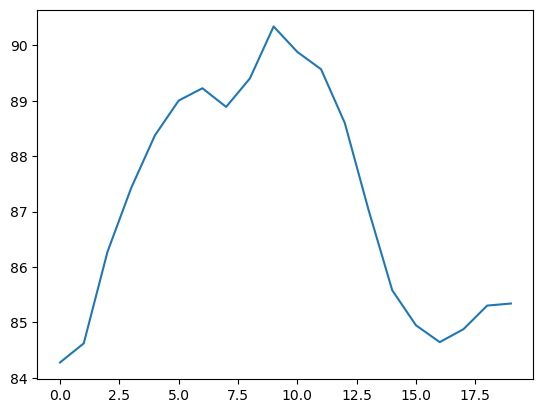

In [163]:
unscaled_predictions_4 = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions_4)

### Comparison of all tests: current.

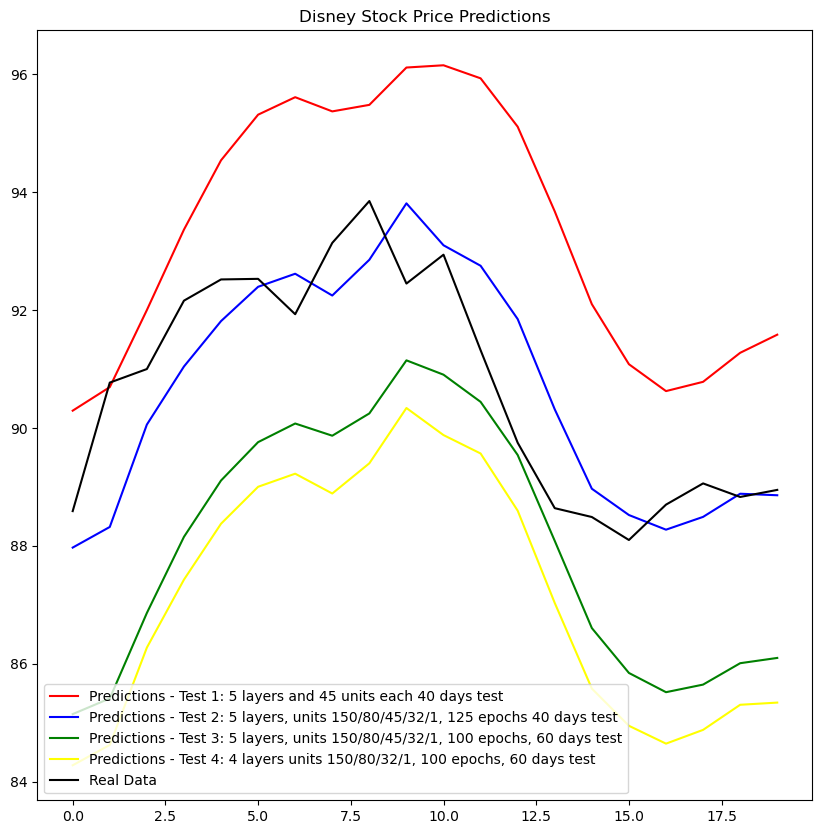

In [164]:
plt.figure(figsize=(10, 10))
plt.plot(unscaled_predictions, color = 'red', label = "Predictions - Test 1: 5 layers and 45 units each 40 days test")
plt.plot(unscaled_predictions_2, color = 'blue', label = "Predictions - Test 2: 5 layers, units 150/80/45/32/1, 125 epochs 40 days test")
plt.plot(unscaled_predictions_3, color = 'green', label = "Predictions - Test 3: 5 layers, units 150/80/45/32/1, 100 epochs, 60 days test")
plt.plot(unscaled_predictions_4, color = 'yellow', label = "Predictions - Test 4: 4 layers units 150/80/32/1, 100 epochs, 60 days test")
plt.plot(test_data, color = 'black', label = "Real Data")
plt.title('Disney Stock Price Predictions')
plt.legend();

### Manual tests logic

As in TEST 1, the prediction outcome was closed enough to the real data, it seems like using 5 layers, with 45 each was a good starting point. The prediction outcome suggesting further price growth.

Following the logic, the highest amount of units (almost 4 times) has been implemented in _TEST 2_ in two first layers to check how the model would perform with the highest computational complexity, including an additional number of epochs. Based on TEST 2, the outcome of the prediction was less precise, therefore further improvement has been performed.

As adding more epochs and units to the model was not a good choice, TEST 3 was performed with the same number of units, but the number of epochs was changed to 100. Also, the number of training days (timesteps) for each predicted price have been changed to 60 to check if the model will perform more precise predictions.

TEST 4 has been performed using the same parameters, however using only 2 hidden layers (4 in total). The final price prediction was similar to TEST 3, which was a big surprise.


-----

# Prediction improvement test: Grid Search

Another model improvement technique is Grid Search, on which user input is required in terms of parameters estimation to find optimal parameters value. In the example below, the grid search tests have been running, focusing on the dropout and LSTM unit values, using Keras Regressor (as the data frame contains continuous values).

### Grid search tests logic

As per manual TEST 3 and TEST 4 presented in screenshot above (on the day of report creation), seem like model trained on previous 60 timesteps with either 4 or 5 layers had the best outcome therefore grid search below has been performed using also 60 training timesteps, following by 100 units per each layer to check the outcome.

In [165]:
training_data_full = yf.download('DIS', start='2018-06-01', end='2023-05-31')
training_data_full = pd.DataFrame(training_data_full)
training_data_full = training_data_full.reset_index()

[*********************100%***********************]  1 of 1 completed


In [166]:
training_data = yf.download('DIS', start='2018-06-01', end='2023-05-31')
training_data = pd.DataFrame(training_data)
training_data = training_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [167]:
training_data = training_data.iloc[:, 4].values

In [168]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [169]:
x_training_data = [] 
y_training_data =[] 

In [170]:
for i in range(60, len(training_data)):
    x_training_data.append(training_data[i-60:i, 0])
    y_training_data.append(training_data[i, 0])

In [171]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [172]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1))

In [173]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasRegressor 

In [174]:
def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(x_training_data.shape[1], 1), dropout=dropout_rate,return_sequences = True))
    model.add(LSTM(units = units,return_sequences = True))
    model.add(LSTM(units = units,return_sequences = True))
    model.add(LSTM(units = units))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [175]:
param_grid = {'units': [45,70, 100, 120],'dropout_rate': [0.2, 0.3]}

In [176]:
model = KerasRegressor(build_fn=create_model, verbose=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14332\2719467250.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=1)


In [177]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_training_data, y_training_data)

38/38 [==============================] - 7s 72ms/step - loss: 0.0343


#### Current grid search outcome

In [178]:
print("Grid search best Score:", grid_result.best_score_)
print("Grid search best Parameters:", grid_result.best_params_)

Grid search best Score: -0.00841094385832548
Grid search best Parameters: {'dropout_rate': 0.2, 'units': 70}


---

#### Greed search outcome during report creation
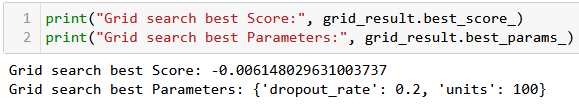

---

#### Grid search output test

As the loss values are higher than in TEST 2 and TEST 3, it is expected a less precise outcome.

In [179]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], # 1st dim will be the 1st part of the tuple
                                               x_training_data.shape[1], # 2nd dim will be a second part of the tuple
                                               1)) 

In [180]:
rnn = Sequential()

In [181]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

rnn.add(LSTM(units = 100, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 100, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 100, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 100))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = 1))

rnn.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy', 'mse'])

In [182]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 99ms/step - loss: 0.0310 - accuracy: 0.0017 - mse: 0.0310
Epoch 2/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0069 - accuracy: 0.0017 - mse: 0.0069
Epoch 3/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0056 - accuracy: 0.0017 - mse: 0.0056
Epoch 4/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0053 - accuracy: 0.0017 - mse: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0047 - accuracy: 0.0017 - mse: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0049 - accuracy: 0.0017 - mse: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0043 - accuracy: 0.0017 - mse: 0.0043
Epoch 8/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0046 - accuracy: 0.0017 - mse: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0052

38/38 [==============================] - 4s 102ms/step - loss: 0.0012 - accuracy: 0.0017 - mse: 0.0012
Epoch 72/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0013 - accuracy: 0.0017 - mse: 0.0013
Epoch 73/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0013 - accuracy: 0.0017 - mse: 0.0013
Epoch 74/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0012 - accuracy: 0.0017 - mse: 0.0012
Epoch 75/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0013 - accuracy: 0.0017 - mse: 0.0013
Epoch 76/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0013 - accuracy: 0.0017 - mse: 0.0013
Epoch 77/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0014 - accuracy: 0.0017 - mse: 0.0014
Epoch 78/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0013 - accuracy: 0.0017 - mse: 0.0013
Epoch 79/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0013 - 

In [183]:
test_data_full = yf.download("DIS", start="2023-06-01", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [184]:
test_data_full = pd.DataFrame(test_data_full)
test_data_full = test_data_full.reset_index()

In [185]:
test_data = yf.download("DIS", start="2023-06-01", end="2023-06-30")
test_data = pd.DataFrame(test_data)
test_data = test_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [186]:
test_data = test_data.iloc[:, 4].values

In [187]:
unscaled_training_data = training_data_full
unscaled_test_data = test_data_full

In [188]:
all_data=pd.concat((unscaled_training_data['Close'],unscaled_test_data['Close']), axis = 0)

In [189]:
x_test_data = all_data[len(all_data) - len(test_data) - 60:].values

In [190]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [191]:
x_test_data = scaler.transform(x_test_data)

In [192]:
final_x_test_data = []

for i in range(60, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-60:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [193]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [194]:
predictions = rnn.predict(final_x_test_data)

1/1 [==============================] - 1s 830ms/step


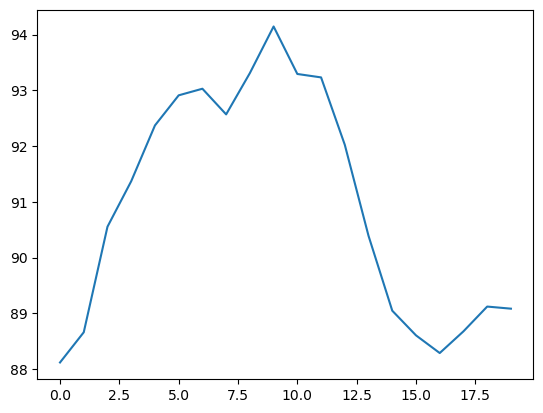

In [195]:
unscaled_predictions_grid_search = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions_grid_search)

#### Test as per Grid search value: current

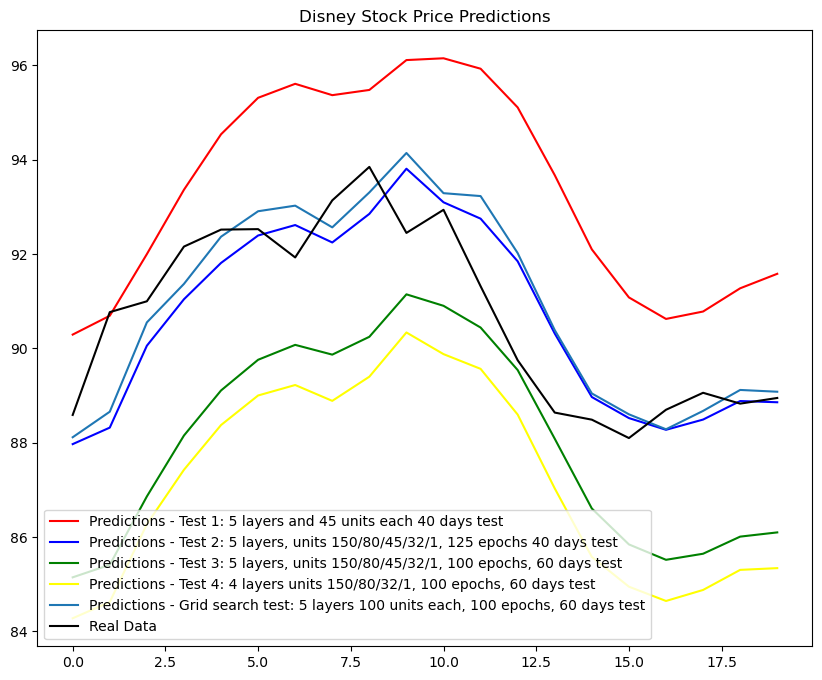

In [196]:
plt.figure(figsize=(10, 8))
plt.plot(unscaled_predictions, color = 'red', label = "Predictions - Test 1: 5 layers and 45 units each 40 days test")
plt.plot(unscaled_predictions_2, color = 'blue', label = "Predictions - Test 2: 5 layers, units 150/80/45/32/1, 125 epochs 40 days test")
plt.plot(unscaled_predictions_3, color = 'green', label = "Predictions - Test 3: 5 layers, units 150/80/45/32/1, 100 epochs, 60 days test")
plt.plot(unscaled_predictions_4, color = 'yellow', label = "Predictions - Test 4: 4 layers units 150/80/32/1, 100 epochs, 60 days test")
plt.plot(unscaled_predictions_grid_search, label = "Predictions - Grid search test: 5 layers 100 units each, 100 epochs, 60 days test")
plt.plot(test_data, color = 'black', label = "Real Data")
plt.title('Disney Stock Price Predictions')
plt.legend();

In [197]:
print("The last trading day price prediction test 1 is for June 2023 is: ",unscaled_predictions[0])
print("The real last trading day price for June 2023 is: ",test_data[0])
print("The last trading day price prediction test 1 is for June 2023 is: ",unscaled_predictions[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction test 1 is for June 2023 is:  [90.294044]
The real last trading day price for June 2023 is:  88.58999633789062
The last trading day price prediction test 1 is for June 2023 is:  [91.582954]
The real last trading day price for June 2023 is:  88.94999694824219


In [198]:
print("The last trading day price prediction test 2 is for June 2023 is: ",unscaled_predictions_2[0])
print("The real last trading day price for June 2023 is: ",test_data[0])
print("The last trading day price prediction test 2 is for June 2023 is: ",unscaled_predictions_2[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction test 2 is for June 2023 is:  [87.971436]
The real last trading day price for June 2023 is:  88.58999633789062
The last trading day price prediction test 2 is for June 2023 is:  [88.85912]
The real last trading day price for June 2023 is:  88.94999694824219


In [199]:
print("The last trading day price prediction test 3 is for June 2023 is: ",unscaled_predictions_3[0])
print("The real last trading day price for June 2023 is: ",test_data[0])
print("The last trading day price prediction test 3 is for June 2023 is: ",unscaled_predictions_3[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction test 3 is for June 2023 is:  [85.14665]
The real last trading day price for June 2023 is:  88.58999633789062
The last trading day price prediction test 3 is for June 2023 is:  [86.09951]
The real last trading day price for June 2023 is:  88.94999694824219


In [200]:
print("The last trading day price prediction test 4 is for June 2023 is: ",unscaled_predictions_grid_search[0])
print("The real last trading day price for June 2023 is: ",test_data[0])
print("The last trading day price prediction test 4 is for June 2023 is: ",unscaled_predictions_grid_search[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction test 4 is for June 2023 is:  [88.11715]
The real last trading day price for June 2023 is:  88.58999633789062
The last trading day price prediction test 4 is for June 2023 is:  [89.08244]
The real last trading day price for June 2023 is:  88.94999694824219


In [201]:
print("The last trading day price prediction test 5 (grid search) is for June 2023 is: ",unscaled_predictions_grid_search[0])
print("The real last trading day price for June 2023 is: ",test_data[0])
print("The last trading day price prediction test 5 (grid search) is for June 2023 is: ",unscaled_predictions_grid_search[19])
print("The real last trading day price for June 2023 is: ",test_data[19])

The last trading day price prediction test 5 (grid search) is for June 2023 is:  [88.11715]
The real last trading day price for June 2023 is:  88.58999633789062
The last trading day price prediction test 5 (grid search) is for June 2023 is:  [89.08244]
The real last trading day price for June 2023 is:  88.94999694824219


----

#### Test as per Grid search value: report creation day

As could be seen below, regardless of the grid search outcome, TEST 3 and TEST 4 still had the most precise prediction outcome.

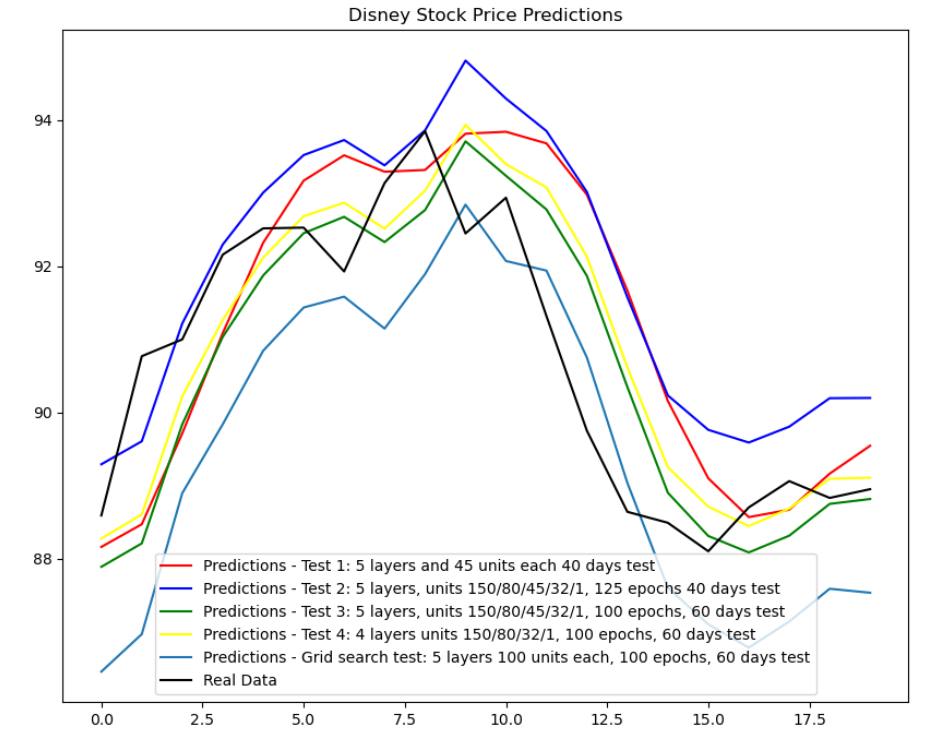